In [1]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import re

import torch
from torch.utils.data import DataLoader

from dpt.plmodels import InteriorNetDPT
from data.InteriorNetDataset import InteriorNetDataset
from data.metrics import SILog, DepthMetrics

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device name: {torch.cuda.get_device_name(0) if device != "cpu" else "cpu"}')

device name: Tesla V100-SXM2-32GB


In [3]:
# k8s paths
k8s = True
k8s_repo = r'opt/repo/dynamic-inference'
k8s_pvc = r'christh9-pvc'

# path settings
model_path = 'weights/dpt_hybrid_nyu-2ce69ec7.pt'
dataset_path = 'video_inference_common/resources'
logs_path = 'train-logs'

checkpoint_name = 'version_293'

if k8s:
    model_path = os.path.join(k8s_pvc, 'dpt-hybrid-nyu.pt')
    dataset_path = os.path.join(k8s_repo, dataset_path)
    logs_path = os.path.join(k8s_pvc, logs_path)
    
    checkpoint_dir = os.path.join(logs_path, 'finetune', checkpoint_name, 'checkpoints')
    
    os.chdir('/')

In [4]:
# select a checkpoint path based on the ones available
# checkpoint_dir = 'lightning_logs/version_1/checkpoints'
ckpts = os.listdir(checkpoint_dir)
sorted(ckpts, key=lambda x: int(re.findall(r'\d+', x)[0]))

['dpt-finetune-epoch=1.ckpt',
 'dpt-finetune-epoch=3.ckpt',
 'dpt-finetune-epoch=5.ckpt',
 'dpt-finetune-epoch=7.ckpt',
 'dpt-finetune-epoch=9.ckpt',
 'dpt-finetune-epoch=11.ckpt',
 'dpt-finetune-epoch=13.ckpt',
 'dpt-finetune-epoch=15.ckpt',
 'dpt-finetune-epoch=17.ckpt',
 'dpt-finetune-epoch=19.ckpt',
 'dpt-finetune-epoch=21.ckpt',
 'dpt-finetune-epoch=23.ckpt',
 'dpt-finetune-epoch=25.ckpt',
 'dpt-finetune-epoch=27.ckpt',
 'dpt-finetune-epoch=29.ckpt',
 'dpt-finetune-epoch=31.ckpt',
 'dpt-finetune-epoch=33.ckpt',
 'dpt-finetune-epoch=35.ckpt',
 'dpt-finetune-epoch=37.ckpt',
 'dpt-finetune-epoch=39.ckpt',
 'dpt-finetune-epoch=41.ckpt',
 'dpt-finetune-epoch=43.ckpt',
 'dpt-finetune-epoch=45.ckpt']

In [5]:
chosen_ckpt = ckpts[-1]
checkpoint_path = os.path.join(checkpoint_dir, chosen_ckpt)

In [6]:
model = InteriorNetDPT(batch_size=1, 
                       lr=0, 
                       num_epochs=0, 
                       model_path=checkpoint_path)

model = model.load_from_checkpoint(checkpoint_path)
model.to(device)
model.freeze()

In [7]:
train_dataset = InteriorNetDataset(dataset_path, split='train', 
                                   transform='default')

test_dataset = InteriorNetDataset(dataset_path, split='test',
                                  transform='default')

example_dataset = InteriorNetDataset(dataset_path, split='test',
                                     transform='default', subsample=True)

train_loader = DataLoader(train_dataset, batch_size=1)

test_loader = DataLoader(test_dataset, batch_size=1)

example_loader = DataLoader(example_dataset, batch_size=1)

metrics = DepthMetrics(n_deltas=3)

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 4 finetune err:
absrel: 0.030162950977683067
mae: 0.08721113204956055
delta1: 0.9926139116287231
delta2: 1.0
delta3: 1.0


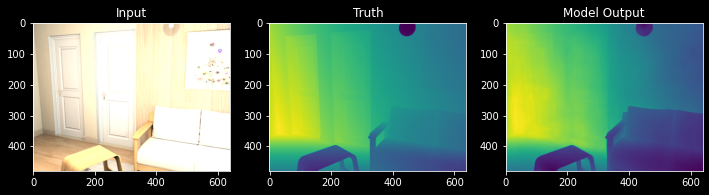

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 9 finetune err:
absrel: 0.047951120883226395
mae: 0.10844454914331436
delta1: 0.9727799296379089
delta2: 0.9824283719062805
delta3: 0.9992513060569763


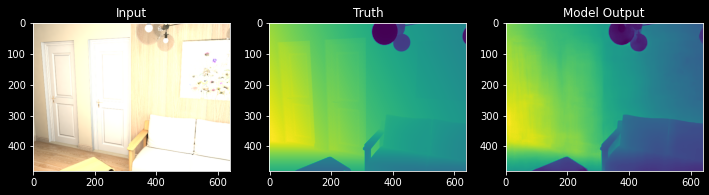

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 14 finetune err:
absrel: 0.08946606516838074
mae: 0.16549620032310486
delta1: 0.921862006187439
delta2: 0.9486100077629089
delta3: 0.9960547089576721


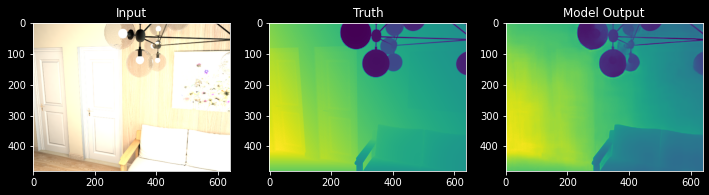

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 19 finetune err:
absrel: 0.13939432799816132
mae: 0.21407663822174072
delta1: 0.85501629114151
delta2: 0.8937890529632568
delta3: 0.9892024993896484


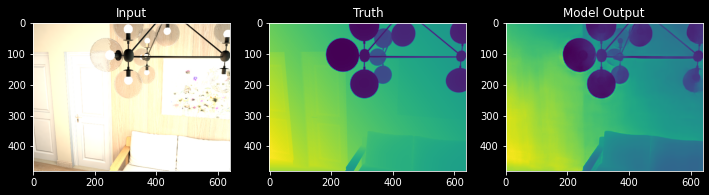

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 24 finetune err:
absrel: 0.14434975385665894
mae: 0.22323107719421387
delta1: 0.8562793135643005
delta2: 0.8975325226783752
delta3: 0.9866796731948853


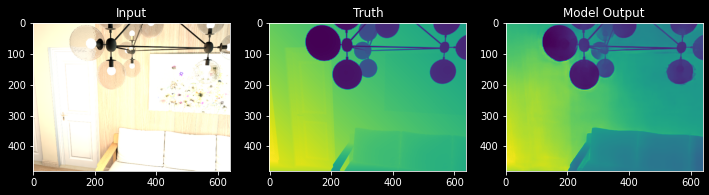

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 29 finetune err:
absrel: 0.1387781947851181
mae: 0.20941224694252014
delta1: 0.8834081888198853
delta2: 0.9067089557647705
delta3: 0.9606966376304626


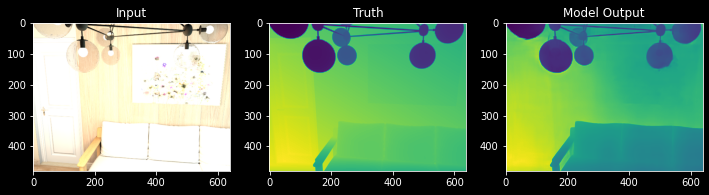

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 34 finetune err:
absrel: 0.1334044486284256
mae: 0.20660540461540222
delta1: 0.8991308808326721
delta2: 0.9233691692352295
delta3: 0.9623372554779053


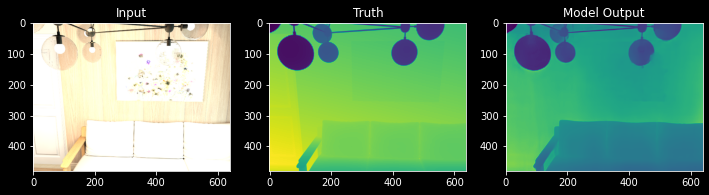

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 39 finetune err:
absrel: 0.09535160660743713
mae: 0.170887753367424
delta1: 0.9496386647224426
delta2: 0.9562402367591858
delta3: 0.9769856929779053


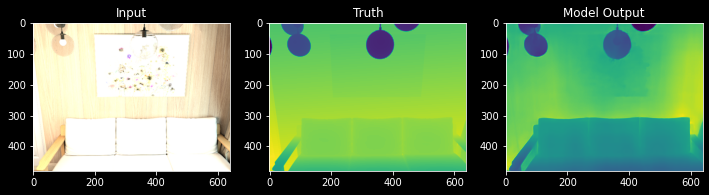

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 44 finetune err:
absrel: 0.09482943266630173
mae: 0.17087599635124207
delta1: 0.9599023461341858
delta2: 0.960289716720581
delta3: 0.976793646812439


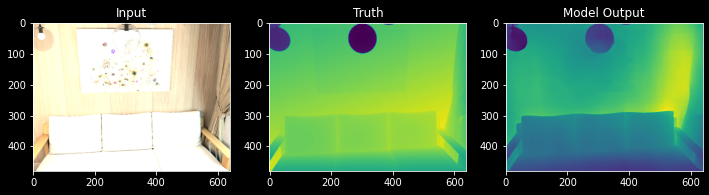

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 49 finetune err:
absrel: 0.08821789920330048
mae: 0.16115091741085052
delta1: 0.973059892654419
delta2: 0.9749544262886047
delta3: 0.9786198139190674


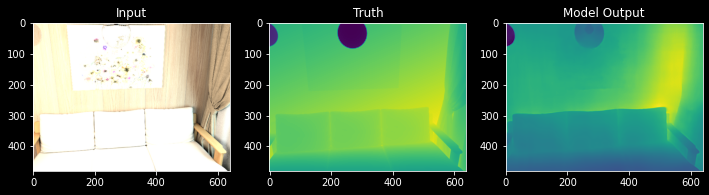

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 54 finetune err:
absrel: 0.08202547580003738
mae: 0.15234653651714325
delta1: 0.9821972846984863
delta2: 0.9824153780937195
delta3: 0.9839746356010437


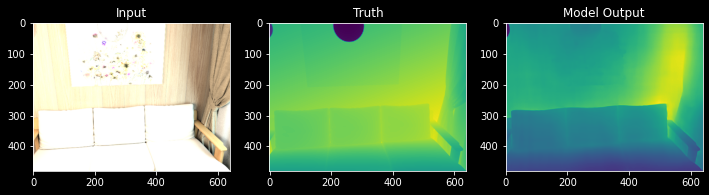

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 59 finetune err:
absrel: 0.060717977583408356
mae: 0.1256788969039917
delta1: 0.9940787553787231
delta2: 0.9941862225532532
delta3: 0.9942350387573242


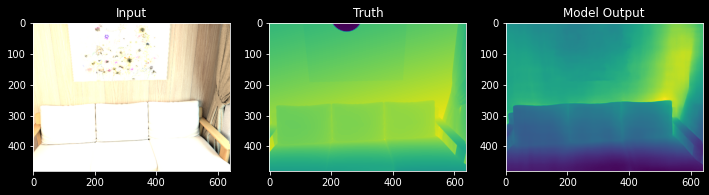

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 64 finetune err:
absrel: 0.051302507519721985
mae: 0.11625122278928757
delta1: 1.0
delta2: 1.0
delta3: 1.0


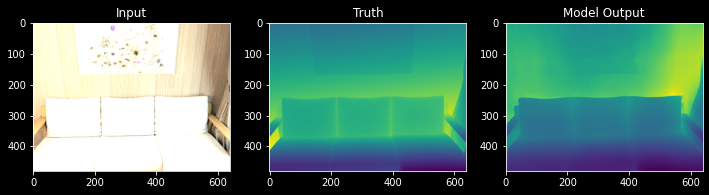

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 69 finetune err:
absrel: 0.05533391609787941
mae: 0.1197911724448204
delta1: 1.0
delta2: 1.0
delta3: 1.0


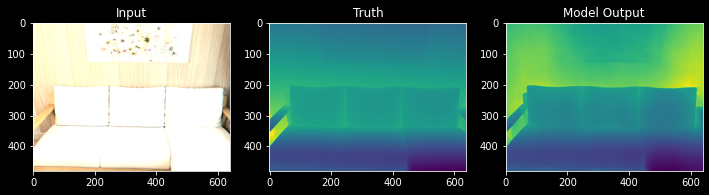

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 74 finetune err:
absrel: 0.04798315837979317
mae: 0.10184371471405029
delta1: 0.9999544024467468
delta2: 1.0
delta3: 1.0


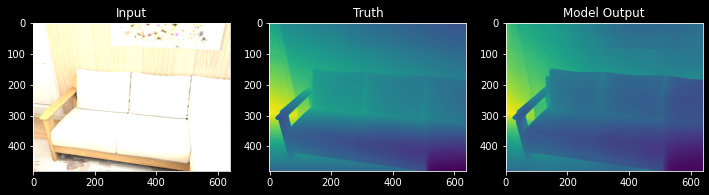

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 79 finetune err:
absrel: 0.041969090700149536
mae: 0.08750961720943451
delta1: 0.9999609589576721
delta2: 1.0
delta3: 1.0


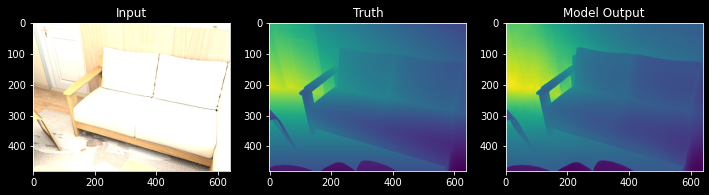

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 84 finetune err:
absrel: 0.047478727996349335
mae: 0.08460355550050735
delta1: 0.998938798904419
delta2: 1.0
delta3: 1.0


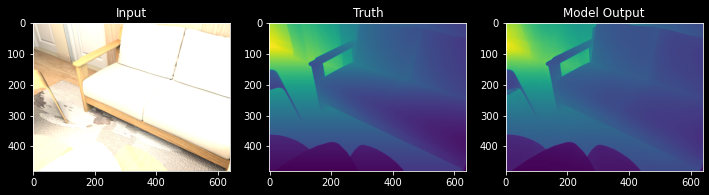

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 89 finetune err:
absrel: 0.04839518666267395
mae: 0.06234228238463402
delta1: 0.9945507645606995
delta2: 0.9999935030937195
delta3: 1.0


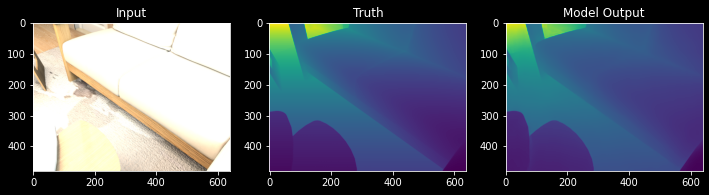

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 94 finetune err:
absrel: 0.05846478417515755
mae: 0.06719832122325897
delta1: 0.997301459312439
delta2: 0.9999739527702332
delta3: 1.0


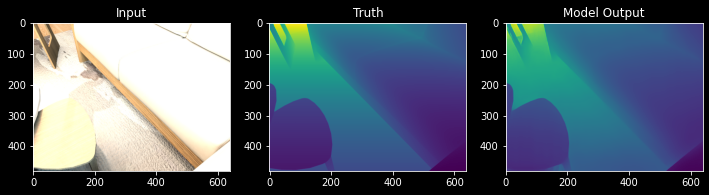

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frame 99 finetune err:
absrel: 0.058144379407167435
mae: 0.07123581320047379
delta1: 0.9990820288658142
delta2: 1.0
delta3: 1.0


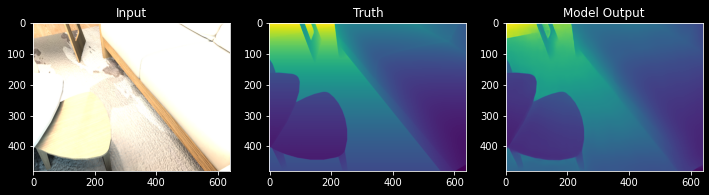

In [15]:
with torch.no_grad():
    for i,batch in enumerate(example_loader):
        if (i+1) % 5 == 0:
            im, depth = batch['image'].to(device), batch['depth'].to(device)
            out = model(im)

            acc = metrics(out, depth, None) # val_
            fig, axs = plt.subplots(1,3, figsize=(12,12))

            print(f'Frame {i} finetune err:')
            acc.pop('s')
            acc.pop('t')
            for name, value in acc.items():
                print(f'{name}: {value}')

            axs[0].imshow(im.squeeze(0).permute([1,2,0]).cpu())
            axs[1].imshow(depth.squeeze(0).cpu())
            axs[2].imshow(out.squeeze(0).cpu())

            axs[0].set_title('Input')
            axs[1].set_title('Truth')
            axs[2].set_title('Model Output')

            plt.show()

In [28]:
from collections import Counter

train_stats = Counter({
    'absrel': 0.,
    'mae': 0.,
    'delta1': 0.,
    'delta2': 0.,
    'delta3': 0.,
    'rmse': 0.,
    'lg10': 0.,
})

i = 0
with torch.no_grad():
    for batch in train_loader:
        im, depth = batch['image'].to(device), batch['depth'].to(device)
        out = model(im)
        
        stats = Counter(metrics(out, depth, None))
        if 's' in stats: del stats['s']
        if 't' in stats: del stats['t']
        
        train_stats += stats
        i += 1
        if i >= 100: break

In [29]:
for stat in train_stats:
    train_stats[stat] /= 100

In [30]:
train_stats

Counter({'absrel': 0.02005809768103063,
         'mae': 0.044230093881487846,
         'delta1': 0.9994141936302186,
         'delta2': 0.9999514323472977,
         'delta3': 0.9999955403804779})